# Predicting the stress level:

the Data are from Kaggle.

[https://www.kaggle.com/yamqwe/depression-anxiety-stress-scales]




In [ ]:
!mkdir DASS_data_21.02.19

!wget https://raw.githubusercontent.com/youssef02/ML-and-PR-/main/DASS_data_21.02.19/data.csv -O ./DASS_data_21.02.19/data.csv

In [2]:
import pandas as pd
import numpy as np

#loading data
pd.options.display.max_columns = 172
df = pd.read_csv('./DASS_data_21.02.19/data.csv', sep=r'\t', engine='python')
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,8,2044,4,34,2153,4,33,2416,4,10,2818,4,13,2259,2,21,5541,1,38,4441,4,31,2451,4,24,3325,4,14,1416,4,37,5021,4,27,2342,4,39,2480,3,6,2476,4,35,1627,3,17,9050,3,30,7001,1,11,4719,4,20,2984,4,36,1313,4,42,2444,4,1,9880,4,2,4695,4,5,1677,3,4,6723,4,3,5953,2,26,8062,4,12,5560,4,7,3032,2,29,3316,3,40,3563,4,23,5594,4,41,1477,1,18,3885,2,9,5265,4,19,1892,3,22,4228,4,32,1574,4,15,2969,IN,2,19,167,166,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,1,12,1,10,2,1,2,None
1,4,2,8118,1,36,2890,2,35,4777,3,28,3090,4,10,5078,4,40,2790,3,18,3408,4,1,8342,3,37,916,2,32,1537,2,21,3926,2,25,3691,4,26,2004,4,4,8888,3,27,4109,3,19,4058,4,12,3692,2,6,3373,1,23,6015,1,16,3023,2,22,2670,3,3,5727,1,39,3641,2,33,2670,2,7,7649,3,11,2537,3,5,2907,4,9,1685,3,41,4726,3,17,6063,2,20,3307,3,14,4995,3,38,2505,2,34,2540,2,31,4359,3,15,3925,4,13,4609,2,30,3755,2,42,2323,1,24,5713,2,8,1334,2,29,5562,US,2,1,193,186,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,None
2,3,7,5784,1,33,4373,4,41,3242,1,13,6470,4,11,3927,3,9,3704,1,17,4550,3,5,3021,2,32,5864,4,21,3722,2,10,3424,1,36,3236,4,23,2489,1,34,7290,4,12,6587,4,22,3627,4,38,2905,2,18,2998,2,8,10233,1,16,4258,4,28,2888,3,4,59592,2,3,11732,4,2,8834,2,29,7358,1,30,4928,2,15,3036,1,19,4127,2,37,3934,2,26,10782,4,1,8273,3,39,3501,1,27,3824,4,25,2141,3,6,17461,4,24,1557,4,40,4446,4,42,1883,2,35,5790,2,14,4432,1,20,2203,4,31,5768,PL,2,5,271,122,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,1,4,3,60,1,1,3,None
3,2,23,5081,3,11,6837,2,37,5521,1,27,4556,3,28,3269,3,26,3231,4,2,7138,2,19,3079,3,31,9650,3,17,4179,2,5,5928,1,21,2838,1,20,2560,4,29,5139,2,22,3597,2,35,3336,3,10,4506,1,14,2695,1,25,8128,2,15,3125,1,6,4061,1,40,4272,1,12,4029,1,9,5630,1,18,30631,2,24,9870,4,4,2411,1,16,9478,3,1,7618,3,32,12639,3,34,5378,1,41,8923,2,38,2977,4,3,5620,1,7,16760,1,8,6427,2,39,3760,1,13,4112,3,42,2769,4,33,4432,4,30,3643,2,36,3698,US,2,3,261,336,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,10,2802,4,2,5628,2,9,6522,4,34,2374,4,11,3054,4,7,2975,3,14,3524,2,33,3033,4,23,2132,4,17,1314,4,16,3181,4,26,2249,3,19,2623,4,35,3093,4,38,7098,4,37,1938,4,15,3502,3,32,4776,3,18,4463,4,4,2436,2,40,4047,4,31,3787,4,42,2102,2,1,12351,4,3,2410,2,22,5056,4,39,3343,3,27,3012,4,20,3520,4,8,1868,4,25,2536,3,24,3725,4,30,2130,3,29,3952,3,21,10694,3,41,3231,4,12,3604,4,28,1950,3,6,6265,MY,2,1766,164,157,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology


In [3]:
# ne pas oublier de changer
# we don't need I because the order does not matter
for i in df:
    if i.endswith('I'):
        df.drop(i, axis=1, inplace=True)

df.head()
        

,Q1A,Q1E,Q2A,Q2E,Q3A,Q3E,Q4A,Q4E,Q5A,Q5E,Q6A,Q6E,Q7A,Q7E,Q8A,Q8E,Q9A,Q9E,Q10A,Q10E,Q11A,Q11E,Q12A,Q12E,Q13A,Q13E,Q14A,Q14E,Q15A,Q15E,Q16A,Q16E,Q17A,Q17E,Q18A,Q18E,Q19A,Q19E,Q20A,Q20E,Q21A,Q21E,Q22A,Q22E,Q23A,Q23E,Q24A,Q24E,Q25A,Q25E,Q26A,Q26E,Q27A,Q27E,Q28A,Q28E,Q29A,Q29E,Q30A,Q30E,Q31A,Q31E,Q32A,Q32E,Q33A,Q33E,Q34A,Q34E,Q35A,Q35E,Q36A,Q36E,Q37A,Q37E,Q38A,Q38E,Q39A,Q39E,Q40A,Q40E,Q41A,Q41E,Q42A,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,3890,4,2122,2,1944,4,2044,4,2153,4,2416,4,2818,4,2259,2,5541,1,4441,4,2451,4,3325,4,1416,4,5021,4,2342,4,2480,3,2476,4,1627,3,9050,3,7001,1,4719,4,2984,4,1313,4,2444,4,9880,4,4695,4,1677,3,6723,4,5953,2,8062,4,5560,4,3032,2,3316,3,3563,4,5594,4,1477,1,3885,2,5265,4,1892,3,4228,4,1574,4,2969,IN,2,19,167,166,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,1,12,1,10,2,1,2,None
1,4,8118,1,2890,2,4777,3,3090,4,5078,4,2790,3,3408,4,8342,3,916,2,1537,2,3926,2,3691,4,2004,4,8888,3,4109,3,4058,4,3692,2,3373,1,6015,1,3023,2,2670,3,5727,1,3641,2,2670,2,7649,3,2537,3,2907,4,1685,3,4726,3,6063,2,3307,3,4995,3,2505,2,2540,2,4359,3,3925,4,4609,2,3755,2,2323,1,5713,2,1334,2,5562,US,2,1,193,186,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,None
2,3,5784,1,4373,4,3242,1,6470,4,3927,3,3704,1,4550,3,3021,2,5864,4,3722,2,3424,1,3236,4,2489,1,7290,4,6587,4,3627,4,2905,2,2998,2,10233,1,4258,4,2888,3,59592,2,11732,4,8834,2,7358,1,4928,2,3036,1,4127,2,3934,2,10782,4,8273,3,3501,1,3824,4,2141,3,17461,4,1557,4,4446,4,1883,2,5790,2,4432,1,2203,4,5768,PL,2,5,271,122,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,1,4,3,60,1,1,3,None
3,2,5081,3,6837,2,5521,1,4556,3,3269,3,3231,4,7138,2,3079,3,9650,3,4179,2,5928,1,2838,1,2560,4,5139,2,3597,2,3336,3,4506,1,2695,1,8128,2,3125,1,4061,1,4272,1,4029,1,5630,1,30631,2,9870,4,2411,1,9478,3,7618,3,12639,3,5378,1,8923,2,2977,4,5620,1,16760,1,6427,2,3760,1,4112,3,2769,4,4432,4,3643,2,3698,US,2,3,261,336,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology
4,2,3215,2,7731,3,4156,4,2802,4,5628,2,6522,4,2374,4,3054,4,2975,3,3524,2,3033,4,2132,4,1314,4,3181,4,2249,3,2623,4,3093,4,7098,4,1938,4,3502,3,4776,3,4463,4,2436,2,4047,4,3787,4,2102,2,12351,4,2410,2,5056,4,3343,3,3012,4,3520,4,1868,4,2536,3,3725,4,2130,3,3952,3,10694,3,3231,4,3604,4,1950,3,6265,MY,2,1766,164,157,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology


In [ ]:
df.drop(['introelapse'] , axis=1, inplace=True)
df.drop(['testelapse'] , axis=1, inplace=True)
df.drop(['surveyelapse'] , axis=1, inplace=True)
df.drop(['gender'] , axis=1, inplace=True)
df.drop(['voted'] , axis=1, inplace=True)
df.drop(['orientation'] , axis=1, inplace=True)
df.drop(['race'] , axis=1, inplace=True)
df.drop(['hand'] , axis=1, inplace=True)
df.drop(['uniquenetworklocation'] , axis=1, inplace=True)






#not needed

In [ ]:


df.drop(['source'] , axis=1, inplace=True)
for i in df:
    if i.startswith('VCL'):
        df.drop(i, axis=1, inplace=True)


In [ ]:
df['age'].sort_values(ascending=False).head(n=10)


StressQ = [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]
for i in range(1,43):
    a = ["Q"+str(i)+"E"]
    b = ["Q"+str(i)+"A"]
    if i not in StressQ:
        df.drop(a, axis=1, inplace=True)
        df.drop(b, axis=1, inplace=True)
print  ("deleted not related questions to stress")

In [12]:


columns_drop_list = []
df.dtypes

#dara cleaning
#df.drop('major', axis=1, inplace=True)
#find strings in columns
for i in df.columns:
    if df[i].dtype == 'object':
        columns_drop_list.append(i)


In [8]:
for i in columns_drop_list:
    df.drop(i, axis=1, inplace=True)

#get 'Q1A' column rows



In [9]:
#implelement the crossvalidation using skilearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31820, 45)
(7955, 45)
(31820,)
(7955,)


<AxesSubplot:>

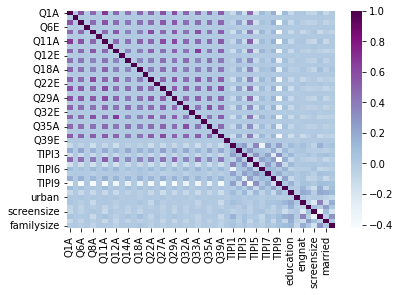

In [10]:
#plotting the data
import matplotlib.pyplot as plt
import seaborn as sns

#data visualization
sns.heatmap(df.corr(), cmap='BuPu')

In [27]:
#get list of columns that start with Q and end with A
columns_QA = []
for i in df.columns:
    if i.startswith('Q') and i.endswith('A'):
        columns_QA.append(i)

        
print(columns_QA)

df["sum"] = df[columns_QA].sum(axis=1)
df.head()



['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A', 'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A']


,Q1A,Q1E,Q6A,Q6E,Q8A,Q8E,Q11A,Q11E,Q12A,Q12E,Q14A,Q14E,Q18A,Q18E,Q22A,Q22E,Q27A,Q27E,Q29A,Q29E,Q32A,Q32E,Q33A,Q33E,Q35A,Q35E,Q39A,Q39E,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,engnat,age,screensize,religion,married,familysize,sum
0,4,3890,4,2416,4,2259,4,2451,4,3325,4,5021,4,1627,4,2984,4,1677,4,5953,4,3032,2,3316,4,5594,4,1892,1,5,7,7,7,7,7,5,1,1,2,3,2,16,1,12,1,2,54
1,4,8118,4,2790,4,8342,2,3926,2,3691,4,8888,2,3373,3,5727,3,2907,3,4726,3,4995,3,2505,2,4359,2,2323,6,5,4,7,5,4,7,7,1,5,2,3,1,16,2,7,1,4,41
2,3,5784,3,3704,3,3021,2,3424,1,3236,1,7290,2,2998,3,59592,2,3036,2,3934,3,3501,1,3824,3,17461,2,5790,2,5,2,2,5,6,5,5,3,2,2,3,2,17,2,4,1,3,31
3,2,5081,3,3231,2,3079,2,5928,1,2838,4,5139,1,2695,1,4272,4,2411,3,7618,1,8923,2,2977,1,16760,3,2769,1,1,7,4,6,4,6,1,6,1,1,3,1,13,2,4,1,5,30
4,2,3215,2,6522,4,3054,2,3033,4,2132,4,3181,4,7098,3,4463,2,12351,2,5056,4,3520,4,1868,3,3725,3,3231,2,5,3,6,5,5,5,6,3,3,3,2,2,19,2,10,1,4,43


In [54]:
#get 3 max sum
df.sort_values(by=['sum'], ascending=False).head(n=3)

,Q1A,Q1E,Q6A,Q6E,Q8A,Q8E,Q11A,Q11E,Q12A,Q12E,Q14A,Q14E,Q18A,Q18E,Q22A,Q22E,Q27A,Q27E,Q29A,Q29E,Q32A,Q32E,Q33A,Q33E,Q35A,Q35E,Q39A,Q39E,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,engnat,age,screensize,religion,married,familysize,sum,stress
3987,4,1959,4,1931,4,1135,4,5402,4,2241,4,5194,4,1378,4,1544,4,1172,4,1930,4,2152,4,1617,4,1974,4,1221,6,7,7,7,3,7,2,6,1,7,1,3,2,14,1,1,1,2,56,True
28733,4,1389,4,1348,4,1065,4,1318,4,1109,4,3378,4,956,4,1060,4,1745,4,1719,4,1176,4,1000,4,3841,4,979,1,7,6,7,2,7,4,1,6,1,2,3,1,18,1,2,1,2,56,True
28862,4,6850,4,1405,4,835,4,1606,4,27746,4,1355,4,1172,4,1619,4,1337,4,1054,4,3092,4,1420,4,1738,4,3088,5,4,5,7,5,7,7,7,4,7,1,2,1,16,1,1,1,2,56,True


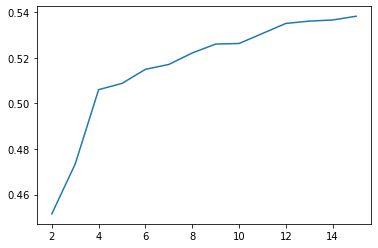

In [56]:
#new dataframe where has only the columns that start with Q and end with A
df_QA = df[columns_QA]

#train test split
X_train, X_test, y_train, y_test = train_test_split(df_QA.iloc[:,:-1], df_QA.iloc[:,-1], test_size=0.2, random_state=0)

#knn on df_QA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acclist_QA = []
for i in range(2,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acclist_QA.append(accuracy_score(y_test, y_pred))

#plotting the accuracy
plt.plot(range(2,16), acclist_QA)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()








['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']


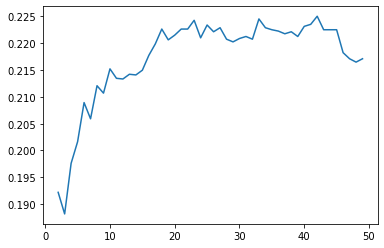

In [66]:
#implement random forest on df_QA
column_TIPI = []
for i in df.columns:
    if i.startswith('TIPI'):
        column_TIPI.append(i)
print(column_TIPI)
df_TIPI = df[column_TIPI]
#select colomns that start with TIPI
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#train test split
X_train, X_test, y_train, y_test = train_test_split(df_TIPI.iloc[:,:-1], df_TIPI.iloc[:,-1], test_size=0.2, random_state=0)

acclist_QA = []
for i in range(2,50):
    rf = RandomForestClassifier(n_estimators=i, random_state=0)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acclist_QA.append(accuracy_score(y_test, y_pred))
#plotting the accuracy
plt.plot(range(2,50), acclist_QA)






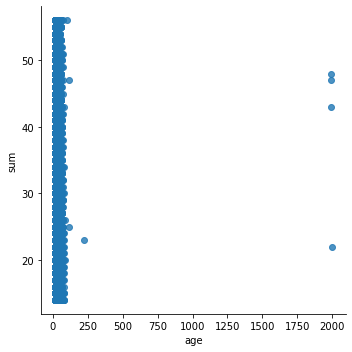

In [58]:
#plot age vs. Q1A
import seaborn as sns
sns.lmplot(x='age', y='sum', data=df, fit_reg=False)


<AxesSubplot:>

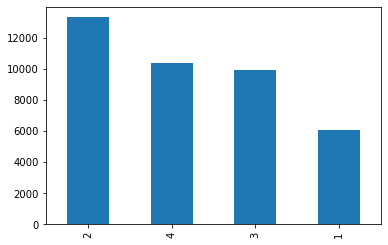

In [12]:

#how many people have answered Q1A
data = df['Q1A'].value_counts()
#plot the data
data.plot(kind='bar')


#everyone that selected 1 as Q1A 










<AxesSubplot:xlabel='age', ylabel='Q1A'>

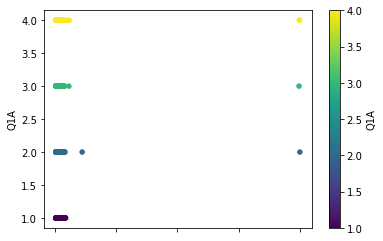

In [15]:



#df plot for Q1A, age and data count where data is how many people have answered 1
df.plot(kind='scatter', x='age', y='Q1A', c='Q1A', colormap='viridis')


In [17]:
df.head()

# voting classifier
from sklearn.ensemble import VotingClassifier
#df_QA with knn and df_TIPI with random forest
Vote = VotingClassifier(estimators=[('knn', knn), ('rf', rf)], voting='hard')

,Q1A,Q1E,Q6A,Q6E,Q8A,Q8E,Q11A,Q11E,Q12A,Q12E,Q14A,Q14E,Q18A,Q18E,Q22A,Q22E,Q27A,Q27E,Q29A,Q29E,Q32A,Q32E,Q33A,Q33E,Q35A,Q35E,Q39A,Q39E,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,engnat,age,screensize,religion,married,familysize
0,4,3890,4,2416,4,2259,4,2451,4,3325,4,5021,4,1627,4,2984,4,1677,4,5953,4,3032,2,3316,4,5594,4,1892,1,5,7,7,7,7,7,5,1,1,2,3,2,16,1,12,1,2
1,4,8118,4,2790,4,8342,2,3926,2,3691,4,8888,2,3373,3,5727,3,2907,3,4726,3,4995,3,2505,2,4359,2,2323,6,5,4,7,5,4,7,7,1,5,2,3,1,16,2,7,1,4
2,3,5784,3,3704,3,3021,2,3424,1,3236,1,7290,2,2998,3,59592,2,3036,2,3934,3,3501,1,3824,3,17461,2,5790,2,5,2,2,5,6,5,5,3,2,2,3,2,17,2,4,1,3
3,2,5081,3,3231,2,3079,2,5928,1,2838,4,5139,1,2695,1,4272,4,2411,3,7618,1,8923,2,2977,1,16760,3,2769,1,1,7,4,6,4,6,1,6,1,1,3,1,13,2,4,1,5
4,2,3215,2,6522,4,3054,2,3033,4,2132,4,3181,4,7098,3,4463,2,12351,2,5056,4,3520,4,1868,3,3725,3,3231,2,5,3,6,5,5,5,6,3,3,3,2,2,19,2,10,1,4
